# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
pd.pandas.set_option('display.max_columns', None)

# Read Dataset

In [4]:
dataset = pd.read_csv('train.csv')

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
dataset.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Part 1: Data Analysis

<font>
1. Missing Values<br/>
2. Distribution of the Numerical Variables<br/>
3. Catigorical Variables  <br/>
4. Cardinality of Categorical Variables  <br/>
5. Oulliers  <br/>
6. Relationship betweem independent(X) and dependent(y) features  <br/>
</font>

## Part 1.1

### 1. Missing Values

In [7]:
columns_with_na = [columns for columns in dataset.columns if dataset[columns].isnull().sum() > 1]

for column_with_na in columns_with_na:
    print('Percentage of null values in {}, is {:.4f}%'.format(column_with_na, dataset[column_with_na].isnull().mean() * 100))

Percentage of null values in LotFrontage, is 17.7397%
Percentage of null values in Alley, is 93.7671%
Percentage of null values in MasVnrType, is 0.5479%
Percentage of null values in MasVnrArea, is 0.5479%
Percentage of null values in BsmtQual, is 2.5342%
Percentage of null values in BsmtCond, is 2.5342%
Percentage of null values in BsmtExposure, is 2.6027%
Percentage of null values in BsmtFinType1, is 2.5342%
Percentage of null values in BsmtFinType2, is 2.6027%
Percentage of null values in FireplaceQu, is 47.2603%
Percentage of null values in GarageType, is 5.5479%
Percentage of null values in GarageYrBlt, is 5.5479%
Percentage of null values in GarageFinish, is 5.5479%
Percentage of null values in GarageQual, is 5.5479%
Percentage of null values in GarageCond, is 5.5479%
Percentage of null values in PoolQC, is 99.5205%
Percentage of null values in Fence, is 80.7534%
Percentage of null values in MiscFeature, is 96.3014%


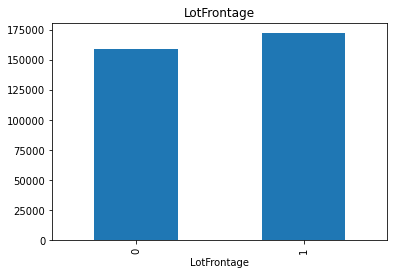

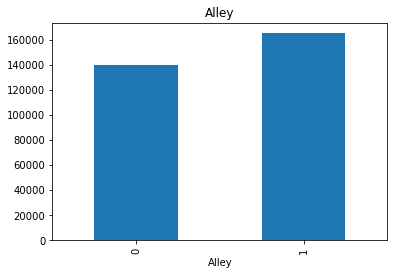

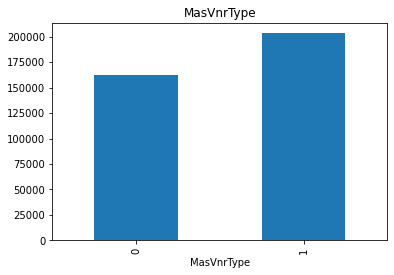

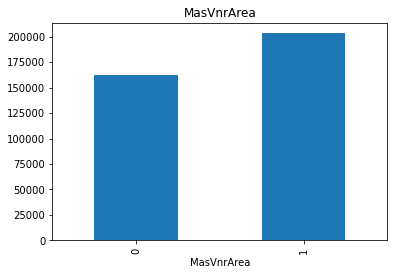

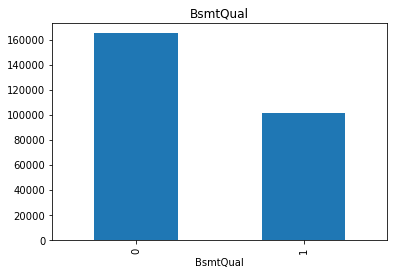

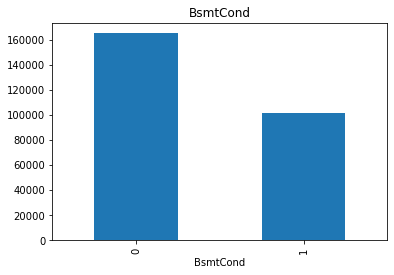

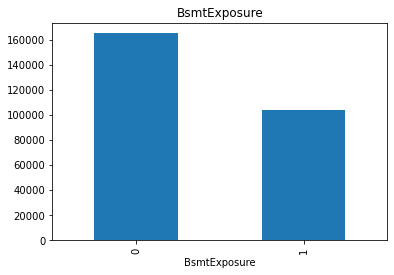

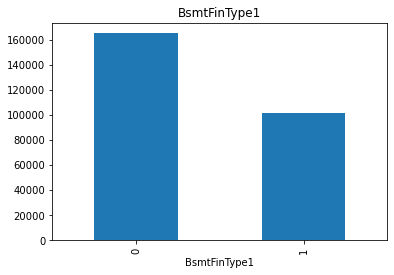

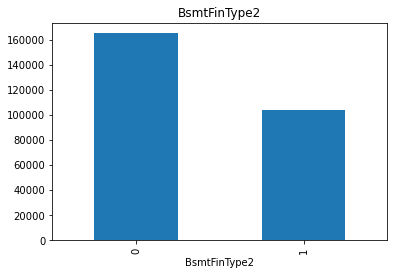

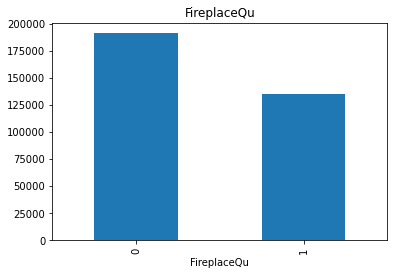

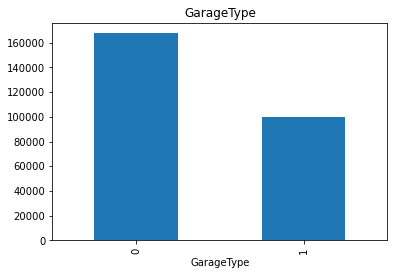

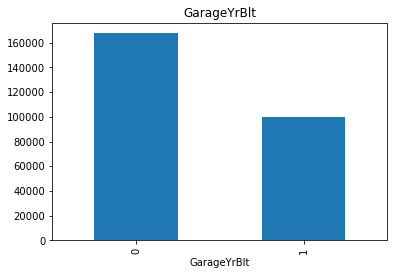

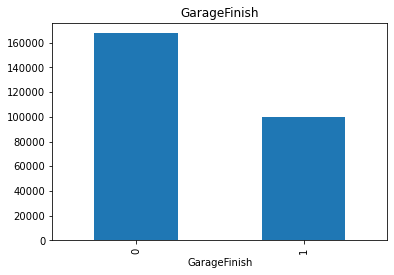

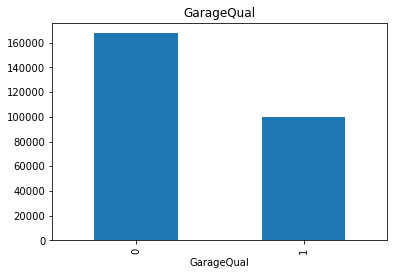

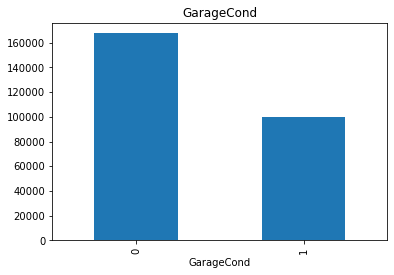

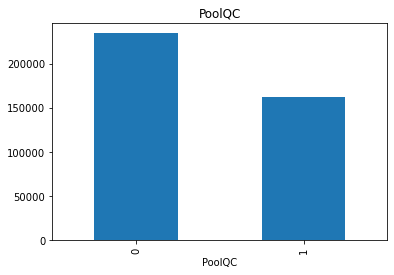

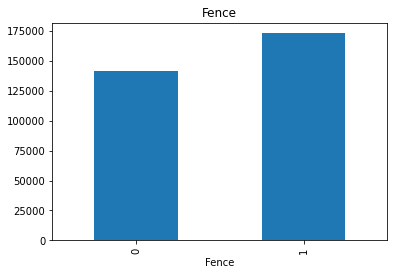

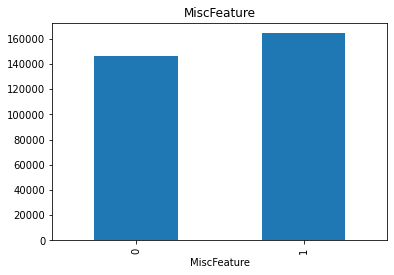

In [8]:
data = dataset[columns_with_na + ['SalePrice']].copy()

for column_with_na in columns_with_na:
    
    data[column_with_na] = np.where(data[column_with_na].isnull(), 1, 0)
    
    data.groupby(column_with_na)['SalePrice'].median().plot.bar()
    plt.title(column_with_na)
    plt.show()

## 2. Numerical Variables

In [9]:
numerical_columns = [column for column in dataset.columns if dataset[column].dtype != 'O']

for numerical_column in numerical_columns:
    print(f'{numerical_column}')

print(f'Total Number of Numerical columns are {len(numerical_columns)}')

Id
MSSubClass
LotFrontage
LotArea
OverallQual
OverallCond
YearBuilt
YearRemodAdd
MasVnrArea
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
1stFlrSF
2ndFlrSF
LowQualFinSF
GrLivArea
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
TotRmsAbvGrd
Fireplaces
GarageYrBlt
GarageCars
GarageArea
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
MiscVal
MoSold
YrSold
SalePrice
Total Number of Numerical columns are 38


In [10]:
# temporal variables
columns_with_year = [column for column in dataset.columns if 'Yr' in column or 'Year' in column]

In [11]:
for column_with_year in columns_with_year:
    print(f'{column_with_year}: {dataset[column_with_year].nunique()}')

YearBuilt: 112
YearRemodAdd: 61
GarageYrBlt: 97
YrSold: 5


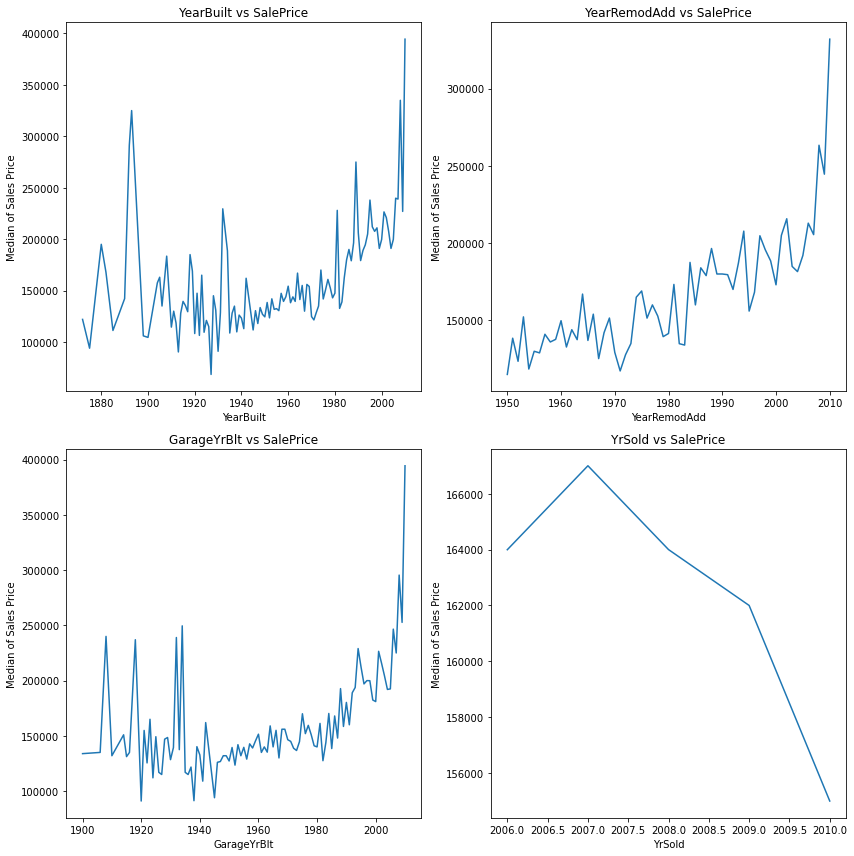

In [12]:
fig, axes = plt.subplots( 2, 2, figsize=(12,12))
col = 0

for ax in axes:
    for index in range(0, len(ax)):
        ax[index].plot(dataset.groupby(columns_with_year[col])['SalePrice'].median())
        ax[index].set_title(f'{columns_with_year[col]} vs SalePrice')
        ax[index].set_xlabel(f'{columns_with_year[col]}')
        ax[index].set_ylabel('Median of Sales Price')
        col += 1
plt.tight_layout()
plt.show()

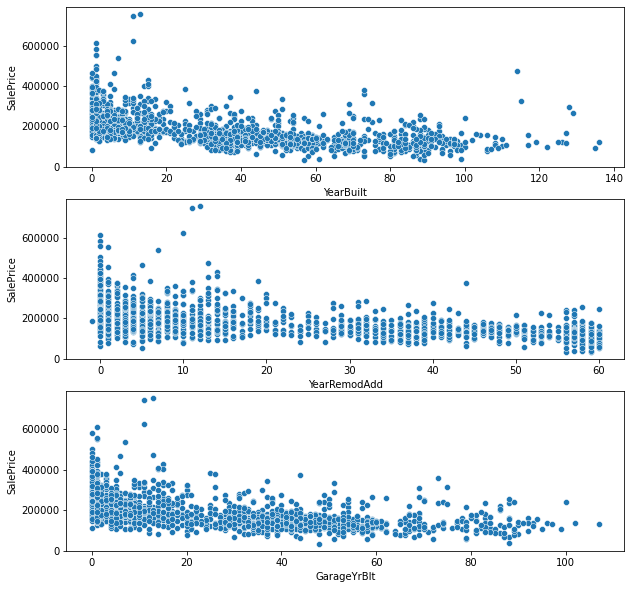

In [13]:
fig, axes = plt.subplots(3,1, figsize=(10,10))
ax = 0

for column_with_year in columns_with_year:
    if column_with_year != 'YrSold':
        data = dataset.copy()
        
        data[column_with_year] = data['YrSold'] - data[column_with_year]
        
        sns.scatterplot(x=data[column_with_year], y=data['SalePrice'], ax=axes[ax])

        ax += 1

In [14]:
# discrete variables
discrete_variables = [col for col in numerical_columns if len(dataset[col].unique()) < 25 and col not in columns_with_year + ['Id']]

for discrete_variable in discrete_variables:
    print(discrete_variable)
    
print(f'Total: {len(discrete_variables)}')

MSSubClass
OverallQual
OverallCond
LowQualFinSF
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
TotRmsAbvGrd
Fireplaces
GarageCars
3SsnPorch
PoolArea
MiscVal
MoSold
Total: 17


In [15]:
# continues variables
cont_variables = [col for col in numerical_columns if len(dataset[col].unique()) > 25 and col not in columns_with_year + ['Id']]

for cont_variable in cont_variables:
    print(cont_variable)
    
print(f'Total: {len(cont_variables)}')

LotFrontage
LotArea
MasVnrArea
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
1stFlrSF
2ndFlrSF
GrLivArea
GarageArea
WoodDeckSF
OpenPorchSF
EnclosedPorch
ScreenPorch
SalePrice
Total: 16


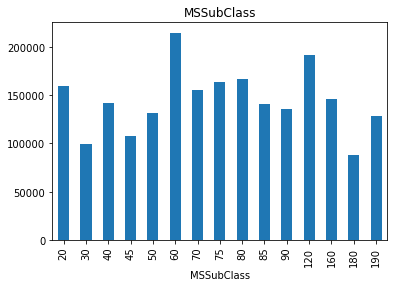

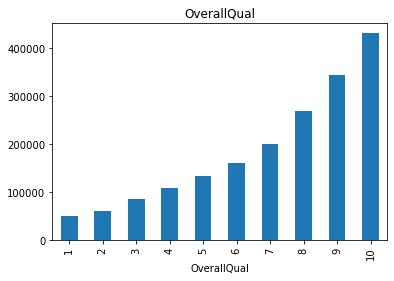

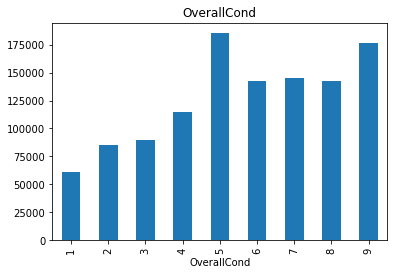

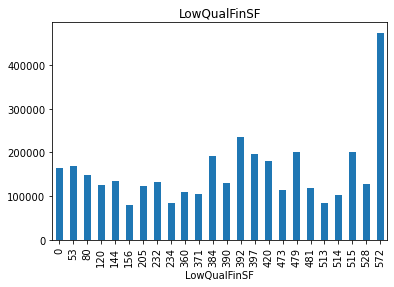

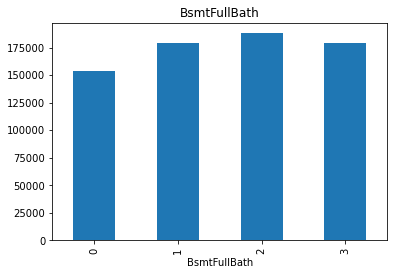

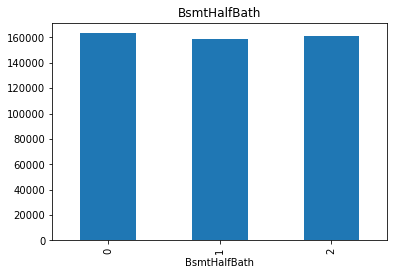

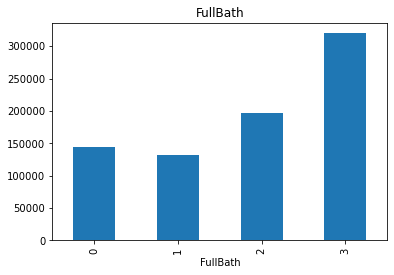

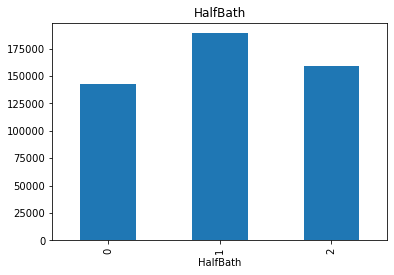

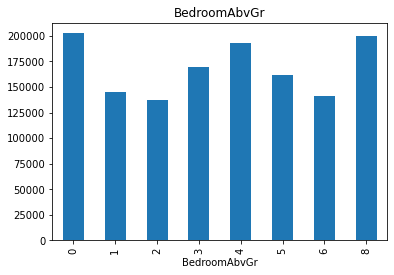

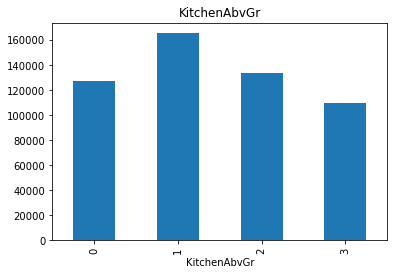

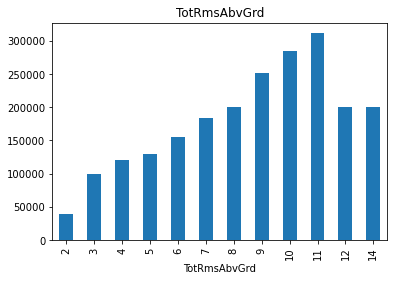

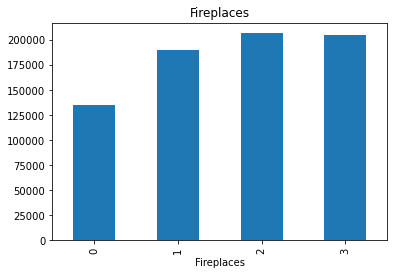

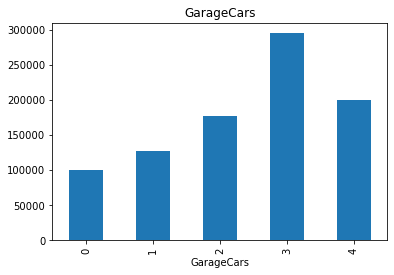

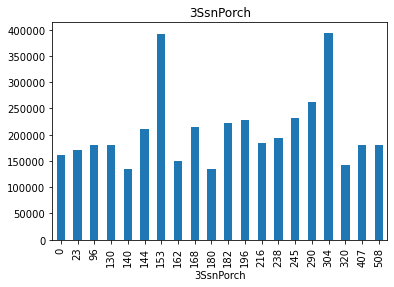

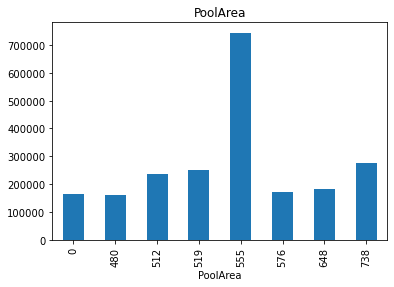

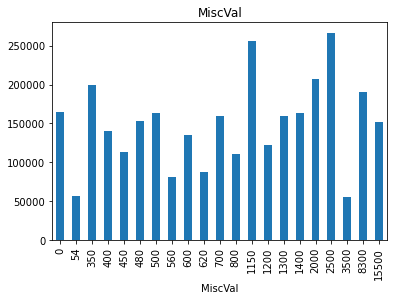

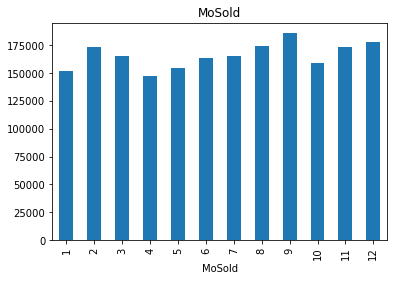

In [16]:
for discrete_variable in discrete_variables:    
    dataset.groupby(discrete_variable)['SalePrice'].median().plot.bar()
    plt.title(discrete_variable)
    plt.show()

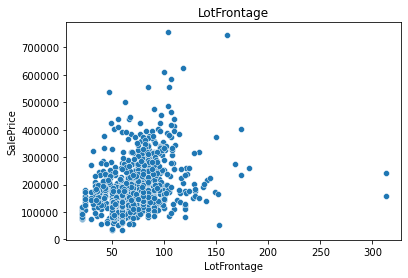

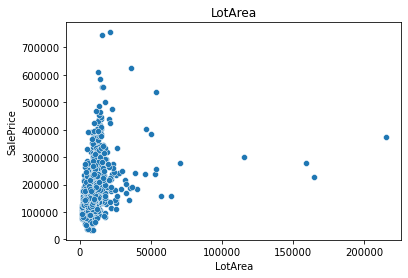

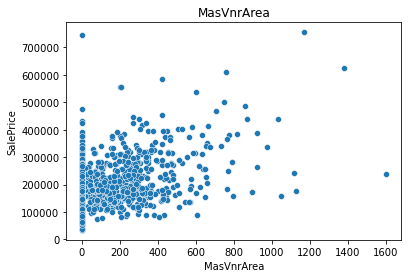

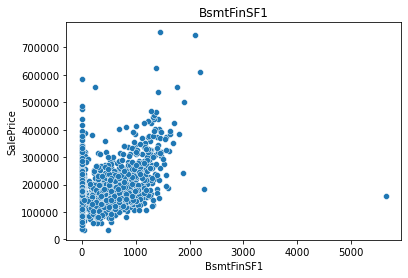

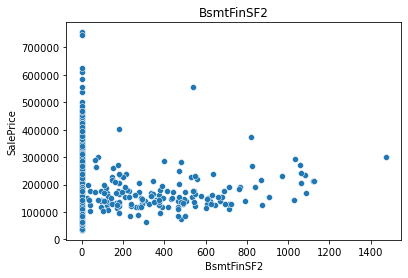

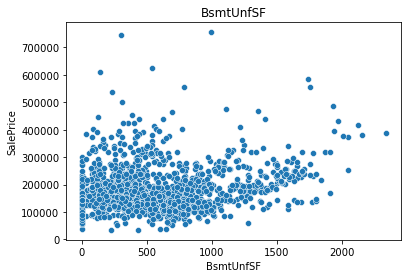

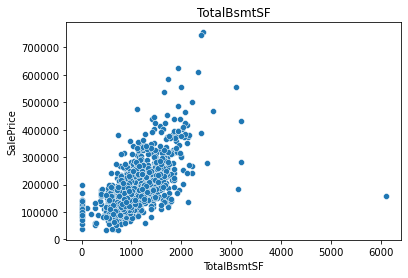

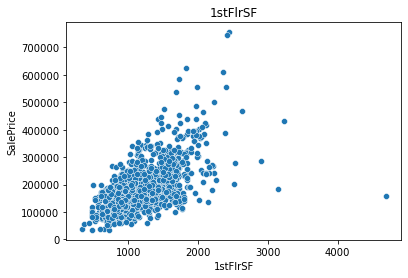

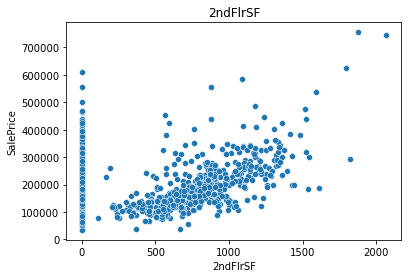

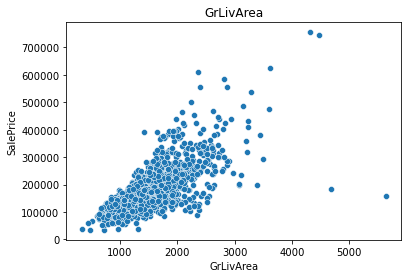

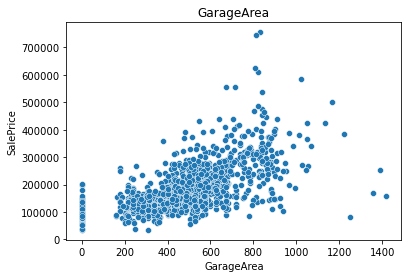

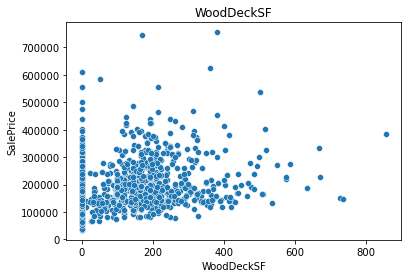

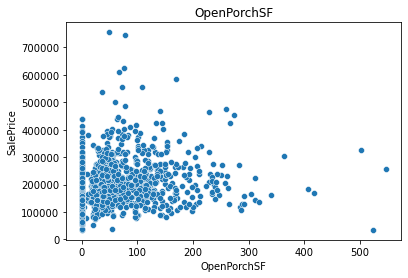

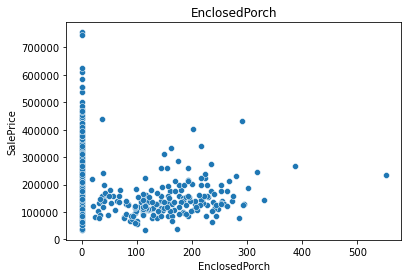

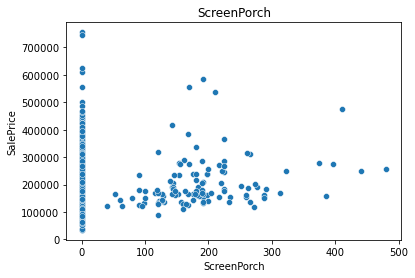

In [17]:
for cont_variable in cont_variables:
    if 'SalePrice' not in cont_variable:
        sns.scatterplot(x=cont_variable, y='SalePrice', data=dataset)
        plt.title(cont_variable)
        plt.show()

## Part 1.2

### 1. Skewnesss

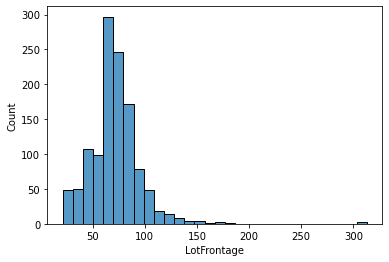

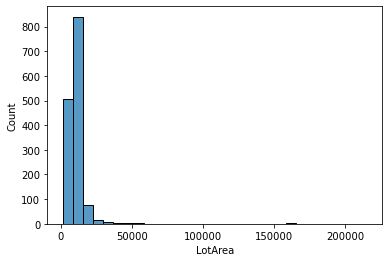

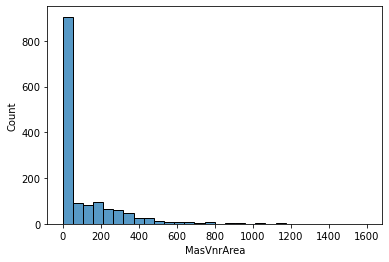

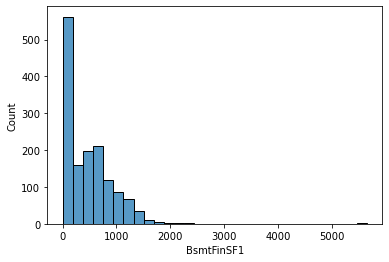

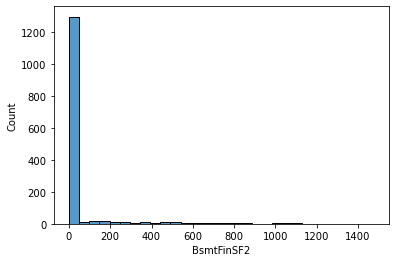

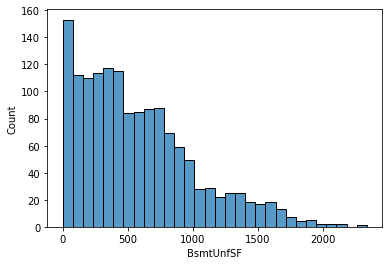

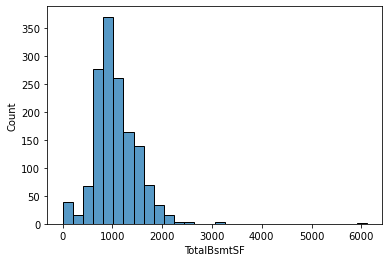

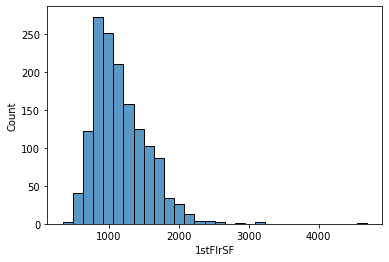

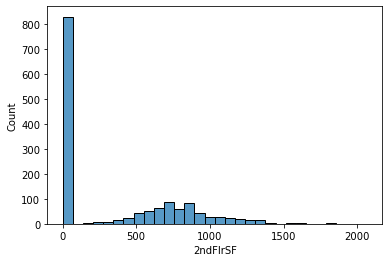

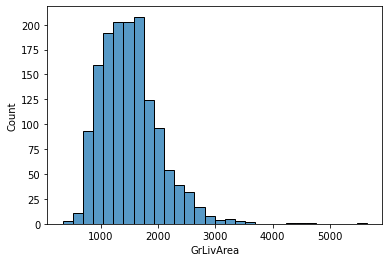

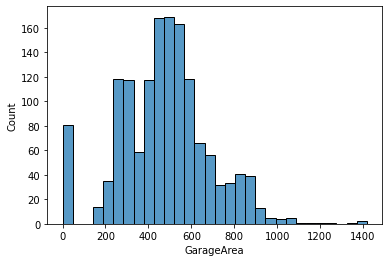

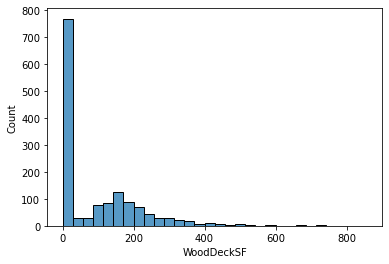

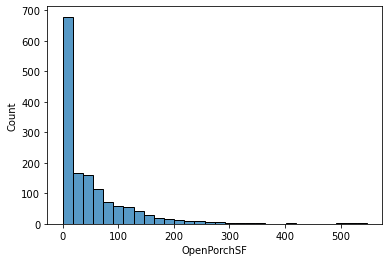

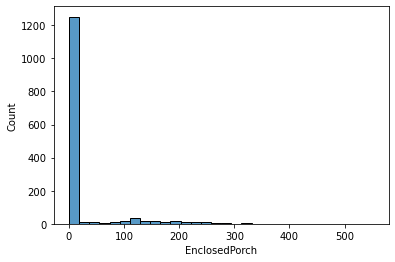

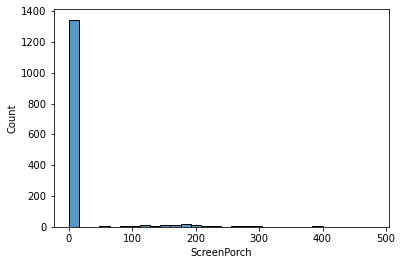

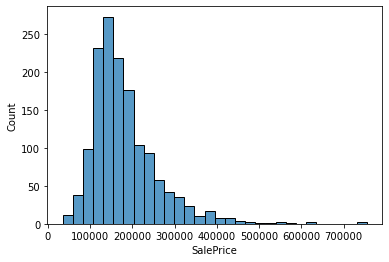

In [18]:
for cont_variable in cont_variables:
        sns.histplot(x=cont_variable, data=dataset, bins=30)
        plt.show()

In [19]:
for cont_variable in cont_variables:
    if 0 not in dataset[cont_variable].unique():
        dataset[cont_variable] = np.log(dataset[cont_variable])

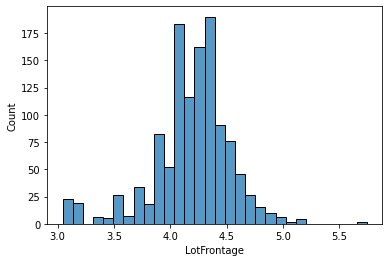

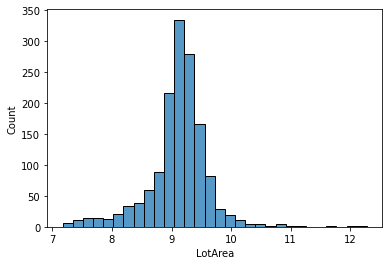

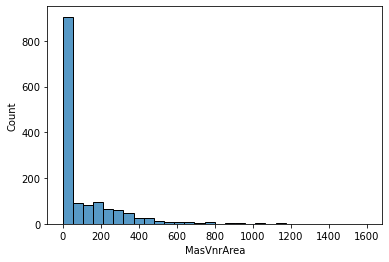

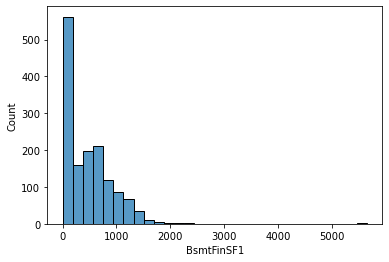

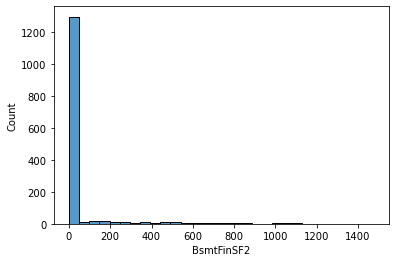

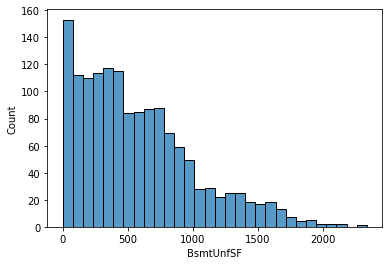

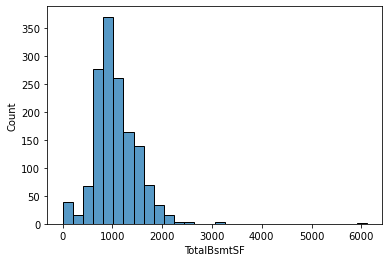

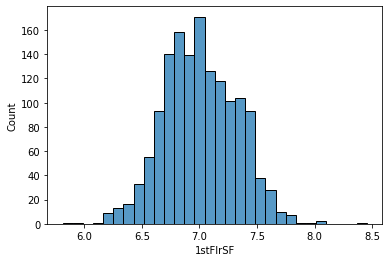

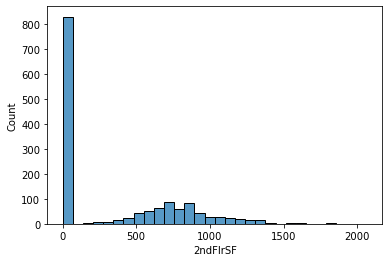

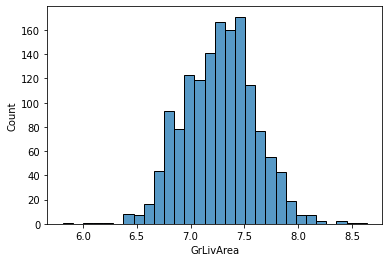

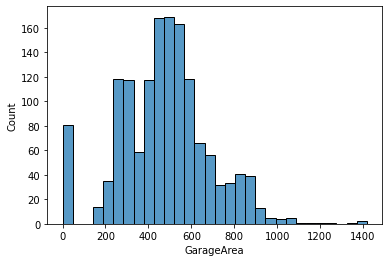

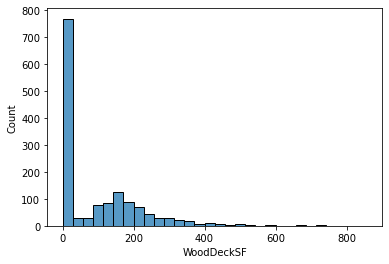

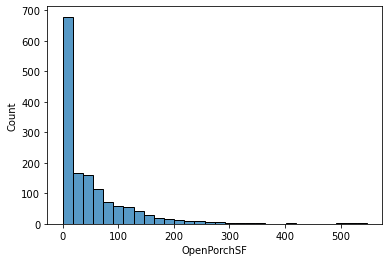

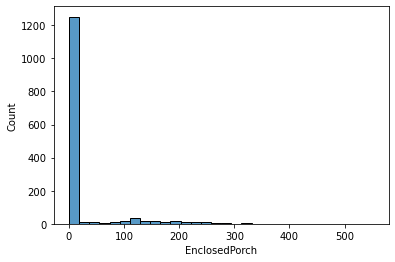

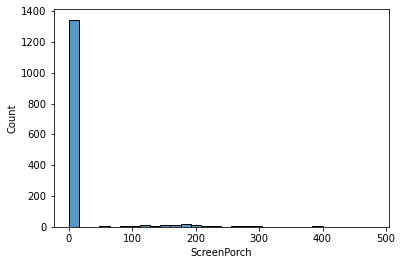

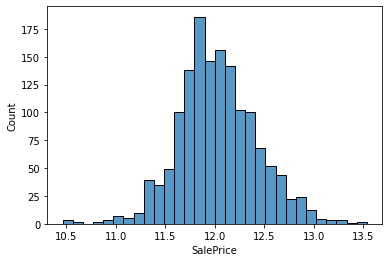

In [20]:
for cont_variable in cont_variables:
    sns.histplot(x=cont_variable, data=dataset, bins=30)
    plt.show()

### 2. Outliers

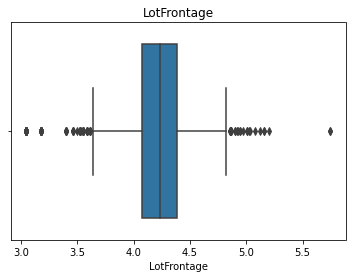

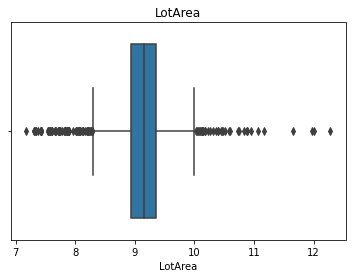

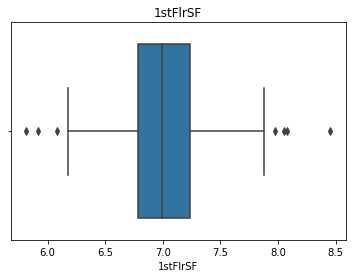

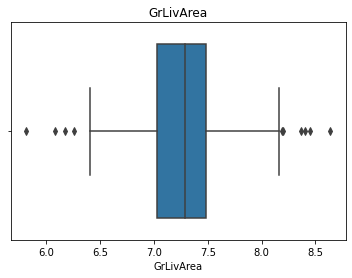

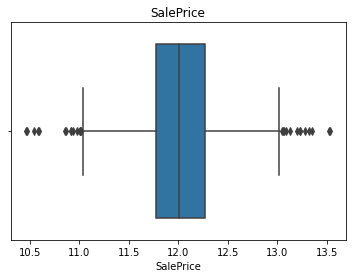

In [21]:
for cont_variable in cont_variables:
    if 0 not in dataset[cont_variable].unique():
        sns.boxplot(x=cont_variable, data=dataset)
        plt.title(cont_variable)
        plt.show()

### 3. Categorical Feature

In [22]:
categorical_columns = [column for column in dataset.columns if dataset[column].dtype == 'O']

In [23]:
for categorical_column in categorical_columns:
    print(f'Feature: {categorical_column} and number of unique values: {dataset[categorical_column].nunique()}')

Feature: MSZoning and number of unique values: 5
Feature: Street and number of unique values: 2
Feature: Alley and number of unique values: 2
Feature: LotShape and number of unique values: 4
Feature: LandContour and number of unique values: 4
Feature: Utilities and number of unique values: 2
Feature: LotConfig and number of unique values: 5
Feature: LandSlope and number of unique values: 3
Feature: Neighborhood and number of unique values: 25
Feature: Condition1 and number of unique values: 9
Feature: Condition2 and number of unique values: 8
Feature: BldgType and number of unique values: 5
Feature: HouseStyle and number of unique values: 8
Feature: RoofStyle and number of unique values: 6
Feature: RoofMatl and number of unique values: 8
Feature: Exterior1st and number of unique values: 15
Feature: Exterior2nd and number of unique values: 16
Feature: MasVnrType and number of unique values: 4
Feature: ExterQual and number of unique values: 4
Feature: ExterCond and number of unique value

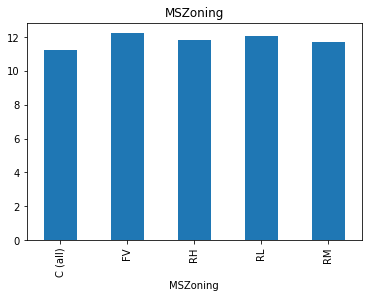

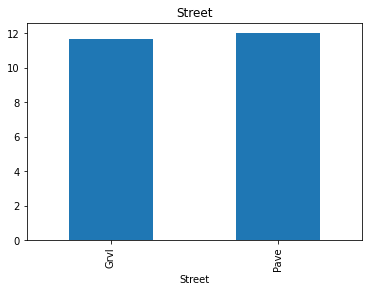

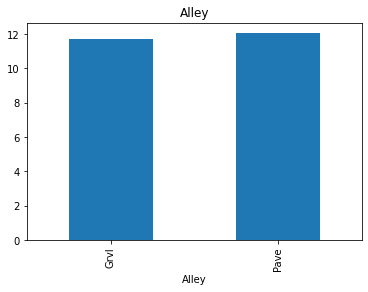

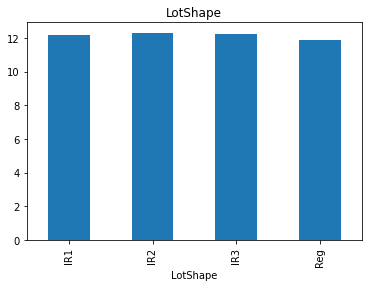

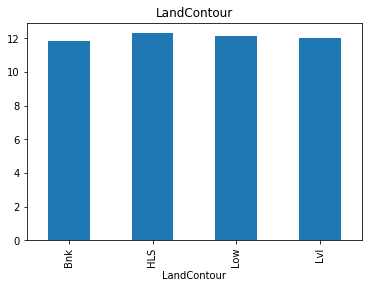

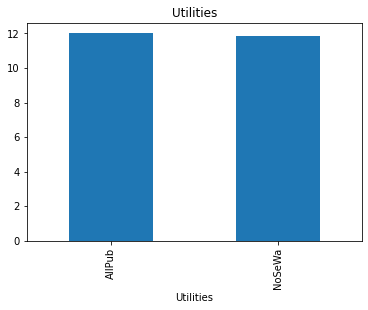

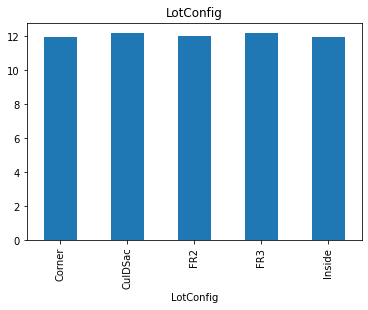

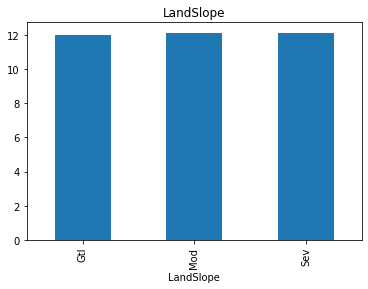

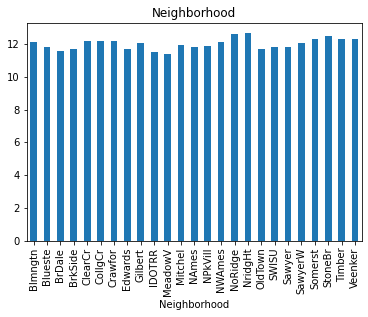

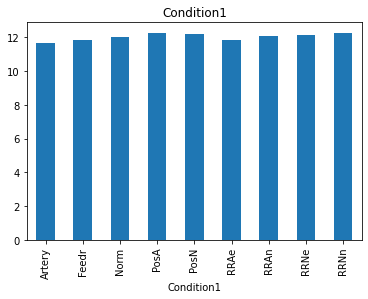

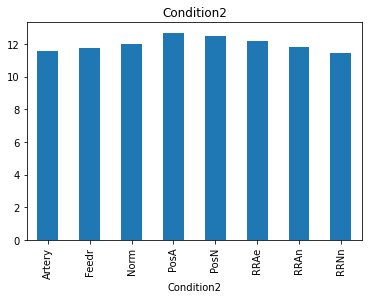

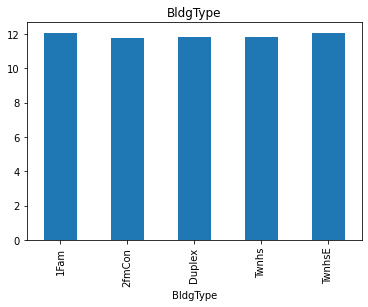

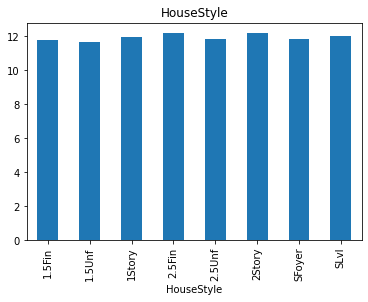

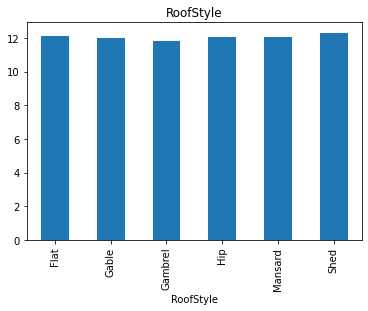

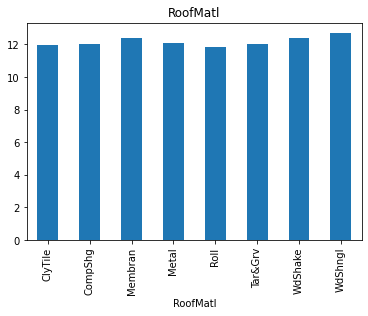

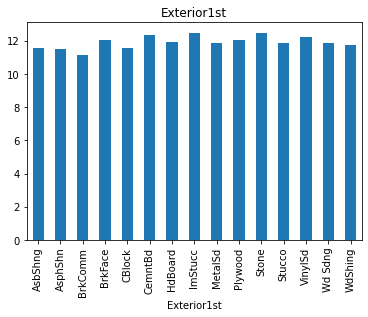

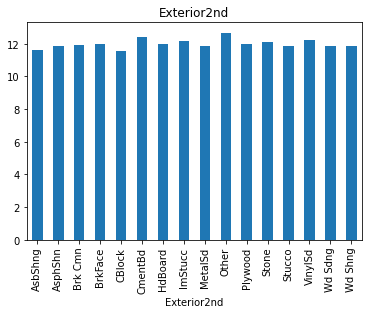

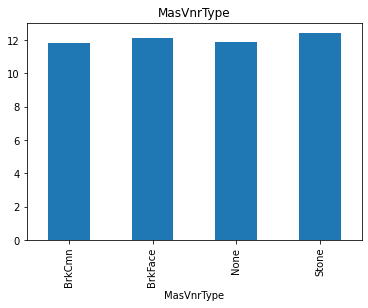

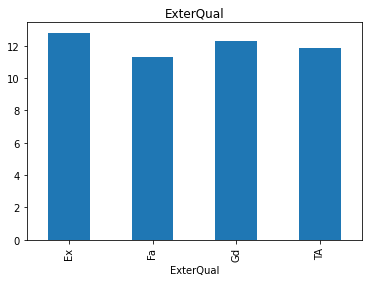

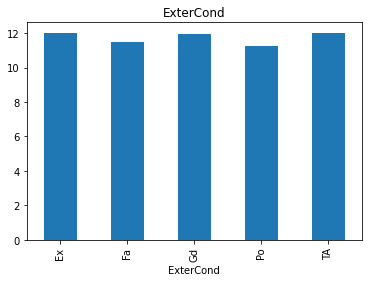

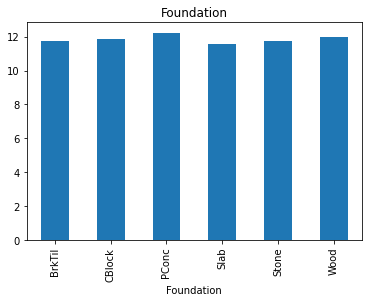

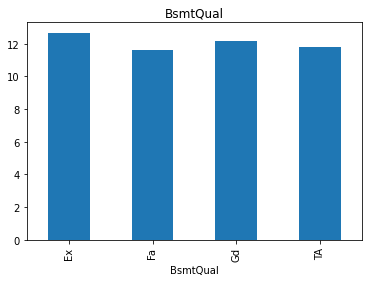

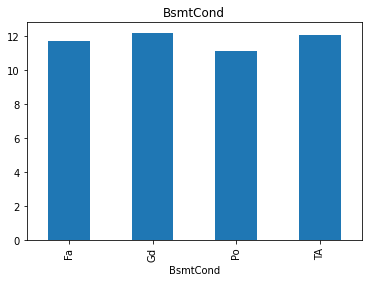

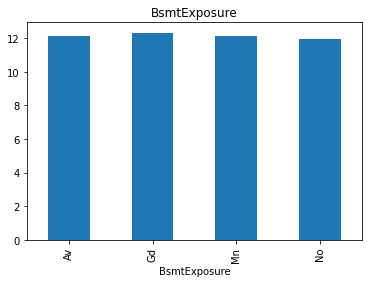

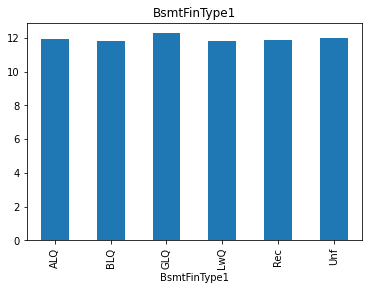

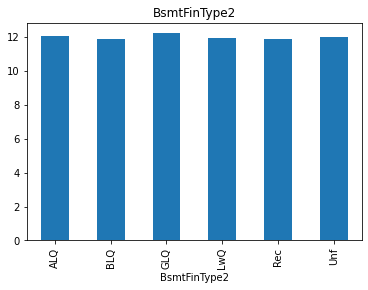

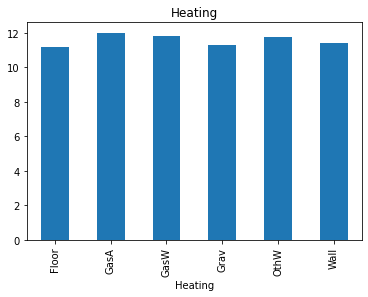

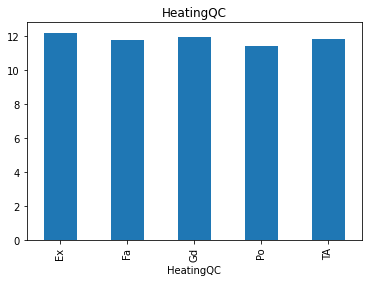

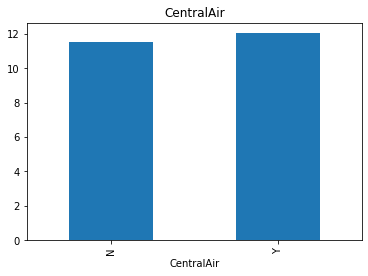

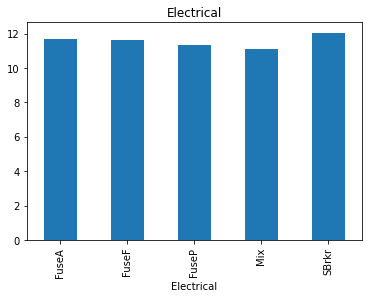

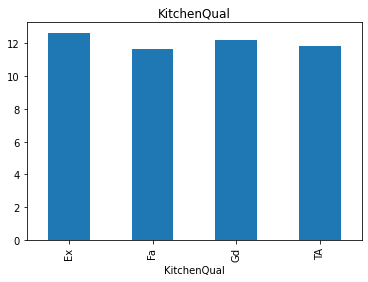

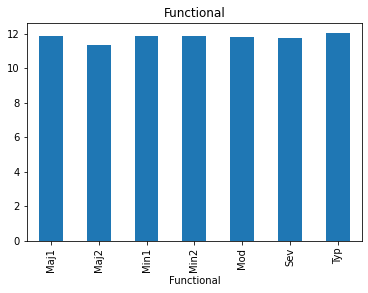

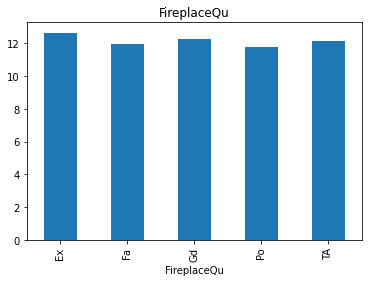

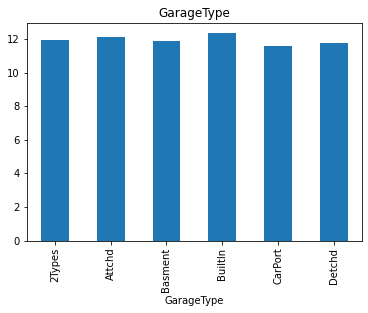

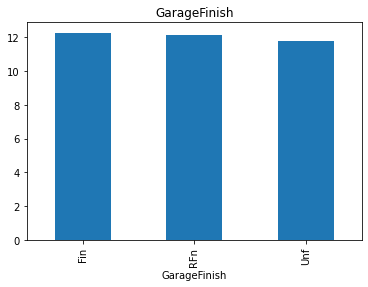

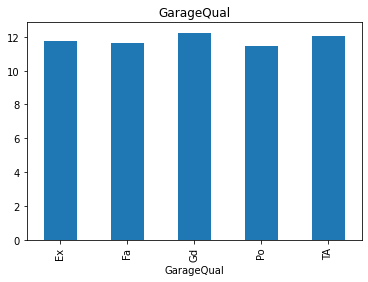

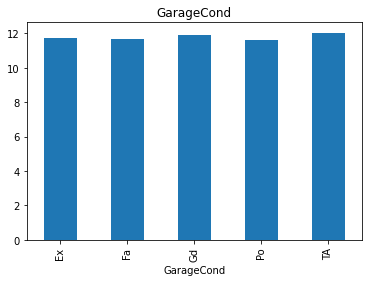

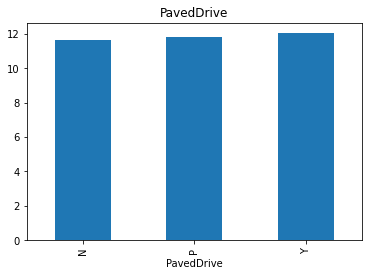

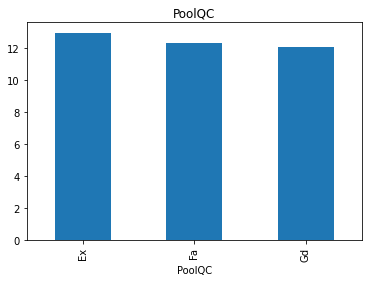

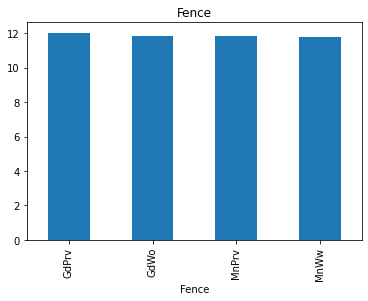

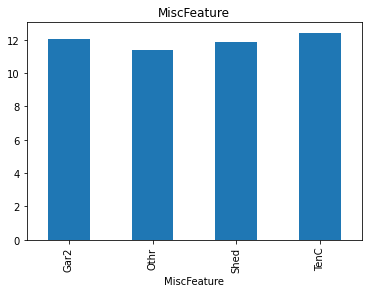

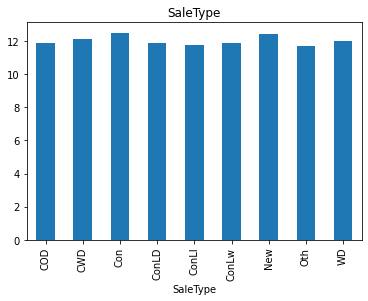

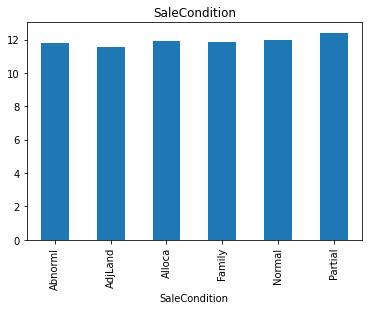

In [24]:
for categorical_column in categorical_columns:
    dataset.groupby(categorical_column)['SalePrice'].median().plot.bar()
    plt.title(categorical_column)
    plt.show()

# Feature Engineering

<font>
1. Missing Values</br>
2. Temporal Variables</br>
3. Categorical Variables: remove rare categories</br>
4. Standardize Variables</br>
</font>

In [369]:
dataset = pd.read_csv('train.csv')

In [370]:
numerical_columns = [column for column in dataset.columns if dataset[column].dtype != 'O']
categorical_columns = [column for column in dataset.columns if dataset[column].dtype == 'O']

In [371]:
# # perform train test split before feature engineering
# from sklearn.model_selection import train_test_split

# train_test_split(dataset.drop(['SalePrice']), dataset['SalePricr'], random_state=42, test_size=0.2)

### Missing Value

In [372]:
categoricals_na = [column for column in dataset.columns if dataset[column].isnull().sum() >= 1 and dataset[column].dtype == 'O']

In [373]:
dataset.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [374]:
for categorical_na in categoricals_na:
    dataset[categorical_na] = dataset[categorical_na].fillna(dataset[categorical_na].value_counts().index[0])

In [375]:
dataset[categoricals_na].isnull().sum()

Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Electrical      0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

In [376]:
numericals_na = [column for column in dataset.columns if dataset[column].isnull().sum() > 1 and dataset[column].dtype != 'O']

In [377]:
for numerical_na in numericals_na:
    
    dataset[numerical_na + '_nan'] = np.where(dataset[numerical_na].isnull(), 1, 0)
    dataset[numerical_na] = dataset[numerical_na].fillna(dataset[numerical_na].median())

In [378]:
dataset[numericals_na].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

### Temporal

In [379]:
for column_with_year in columns_with_year:
    if column_with_year != 'YrSold':
        dataset[column_with_year + '_YrSold'] = dataset['YrSold'] - dataset[column_with_year]
        
        dataset.drop([column_with_year], axis=1, inplace=True)
        numerical_columns.remove(column_with_year)
        numerical_columns.append(column_with_year + '_YrSold')

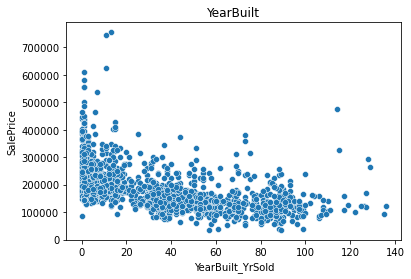

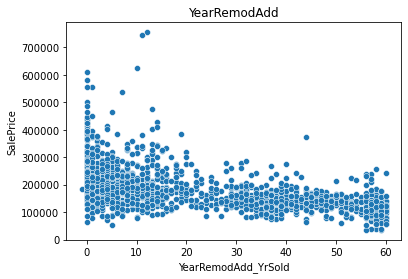

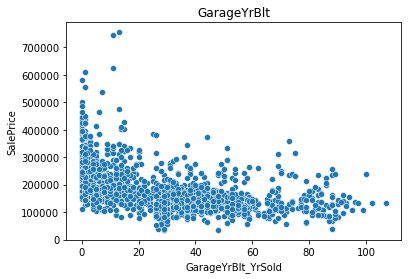

In [380]:
for column_with_year in columns_with_year:
    if column_with_year != 'YrSold':
        sns.scatterplot(x=dataset[column_with_year + '_YrSold'], y=dataset['SalePrice'])
        plt.title(column_with_year)
        plt.show()

### Skewness - np.log() -- Completed

### Rare Categorical Featrue Value

<p> If a categorical value is present less than 1% of the time.</p>

In [381]:
categorical_columns

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [382]:
# for feature in categorical_columns:
#     temp = dataset.groupby(feature)['SalePrice'].count() / len(dataset)
#     temp_df = temp[temp < 0.01].index

#     dataset[feature] = np.where(dataset[feature].isin(temp_df), 'Rare_var', dataset[feature])

### Handing Categorical

In [383]:
dataset.dropna(inplace=True)

In [384]:
dataset.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPor

In [385]:
from sklearn.preprocessing import StandardScaler

encoder = StandardScaler()

data = dataset.copy()

for column in categorical_columns:
    data[column] = encoder.fit_transform(data[column])

ValueError: could not convert string to float: 'RL'

### Feature Scaling

In [ ]:
numerical_columns.remove('Id')
numerical_columns.remove('SalePrice')

In [ ]:
from sklearn.preprocessing import MinMaxScaler

feature_scale = categorical_columns + numerical_columns

sc = MinMaxScaler()
sc.fit(data[feature_scale])

In [ ]:
data = pd.concat([data[['Id', 'SalePrice']],
                    pd.DataFrame(sc.transform(data[feature_scale]), columns=feature_scale)],
                    axis=1)

In [ ]:
data

In [ ]:
data.to_csv('training.csv')

# Feature Selection

In [386]:
data = pd.read_csv('training.csv')

In [387]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [388]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage_nan,MasVnrArea_nan,GarageYrBlt_nan,YearBuilt_YrSold,YearRemodAdd_YrSold,GarageYrBlt_YrSold
0,1,60,RL,65.0,8450,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Gd,Attchd,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Gd,MnPrv,Shed,0,2,2008,WD,Normal,208500,0,0,0,5,5,5.0
1,2,20,RL,80.0,9600,Pave,Grvl,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Gd,MnPrv,Shed,0,5,2007,WD,Normal,181500,0,0,0,31,31,31.0
2,3,60,RL,68.0,11250,Pave,Grvl,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Gd,MnPrv,Shed,0,9,2008,WD,Normal,223500,0,0,0,7,6,7.0
3,4,70,RL,60.0,9550,Pave,Grvl,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Gd,MnPrv,Shed,0,2,2006,WD,Abnorml,140000,0,0,0,91,36,8.0
4,5,60,RL,84.0,14260,Pave,Grvl,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Gd,MnPrv,Shed,0,12,2008,WD,Normal,250000,0,0,0,8,8,8.0


In [389]:
X_train = data.drop(['Unnamed: 0', 'Id', 'SalePrice'], axis=1)
y_train = data['SalePrice']

In [390]:
feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0)) # remember to set the seed, the random state in this function
feature_sel_model.fit(X_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [391]:
feature_sel_model.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [392]:
selected_feat = X_train.columns[(feature_sel_model.get_support())]

# let's print some stats
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(feature_sel_model.estimator_.coef_ == 0)))

total features: 79
selected features: 79
features with coefficients shrank to zero: 0


In [393]:
X_train=X_train[selected_feat]

In [394]:
# evaluate an xgboost regression model on the housing dataset
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from xgboost import XGBRegressor

# define model
model = XGBRegressor()
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

Mean MAE: 16871.497 (1419.980)


In [395]:
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=16, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

# Test

In [396]:
test = pd.read_csv('test.csv')

In [397]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [398]:
test.drop(['Id'], axis=1, inplace=True)

In [399]:
numerical_columns = [column for column in test.columns if test[column].dtype != 'O']
categorical_columns = [column for column in test.columns if test[column].dtype == 'O']

In [400]:
if len(test.columns) == len(numerical_columns) + len(categorical_columns):
    print('Partition validated')

Partition validated


## Missing Value

In [401]:
numerical_with_na = [column for column in test.columns if test[column].isnull().sum() > 0 and test[column].dtype != 'O']

In [402]:
categorical_with_na = [column for column in test.columns if test[column].isnull().sum() > 0 and test[column].dtype == 'O']

In [403]:
count = 0

for na_result in test.isnull().sum() > 0:
    if na_result:
        count += 1
        
if count == len(numerical_with_na) + len(categorical_with_na):
    print('Partition validated')

Partition validated


In [404]:
numerical_with_na

['LotFrontage',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea']

In [405]:
na_validation = set()
for column in numerical_with_na:
    test[column + '_na'] = np.where(test[column].isnull(), 1, 0)
    na_validation.add(column + '_na')
    test[column] = test[column].fillna(test[column].median())

In [406]:
test[numerical_with_na].isnull().sum()

LotFrontage     0
MasVnrArea      0
BsmtFinSF1      0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
BsmtFullBath    0
BsmtHalfBath    0
GarageYrBlt     0
GarageCars      0
GarageArea      0
dtype: int64

In [407]:
for column in categorical_with_na:
    test[column] = test[column].fillna(test[column].value_counts().index[0])

In [408]:
test[categorical_with_na].isnull().sum()

MSZoning        0
Alley           0
Utilities       0
Exterior1st     0
Exterior2nd     0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
KitchenQual     0
Functional      0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
SaleType        0
dtype: int64

## Temporal

In [409]:
column_with_year = [column for column in test.columns if 'Yr' in column or 'Year' in column]

In [410]:
column_with_year.remove('GarageYrBlt_na')

In [411]:
for column in column_with_year:
    if 'YrSold' != column:
        test[column] = test['YrSold'] - test[column]

## Skewnesss

In [412]:
continuos_numerical = [column for column in numerical_columns if len(test[column].unique()) > 25 and column not in set(column_with_year) and column not in na_validation]

In [413]:
discrete_numerical = [column for column in numerical_columns if len(test[column].unique()) <= 25 and column not in set(column_with_year) and column not in na_validation]

In [414]:
if len(numerical_columns) == len(continuos_numerical) + len(discrete_numerical) + len(column_with_year):
    print('Partition Validated')

Partition Validated


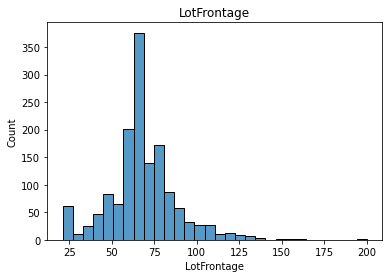

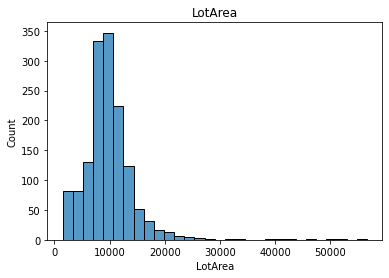

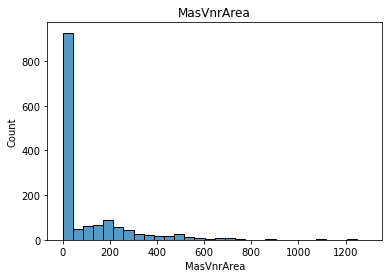

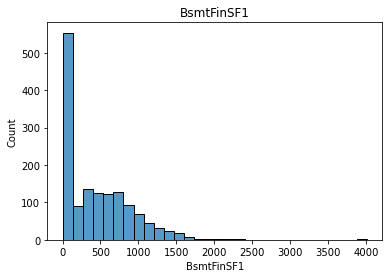

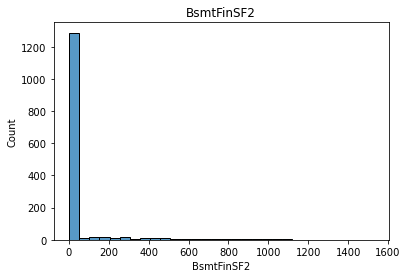

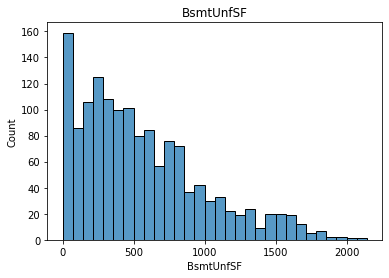

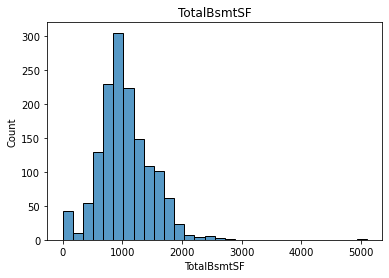

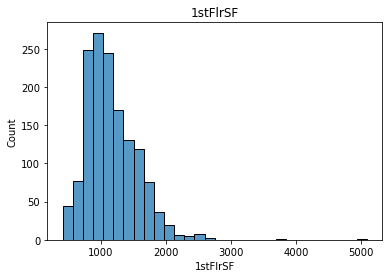

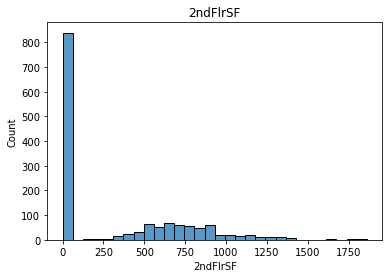

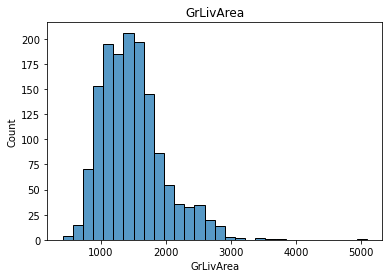

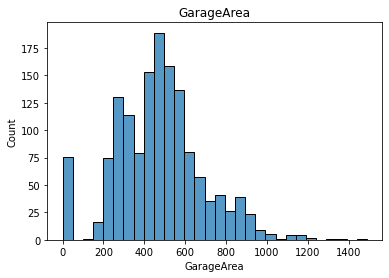

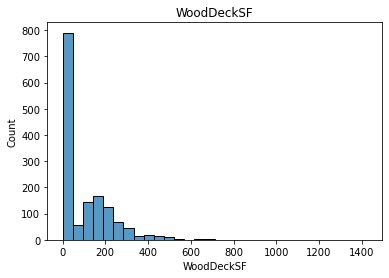

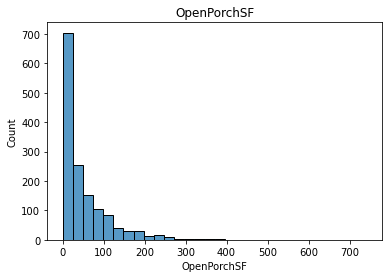

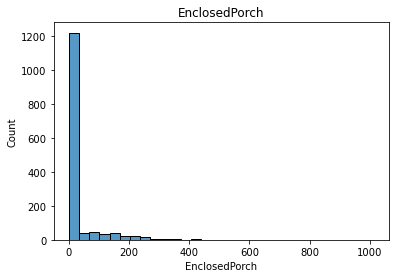

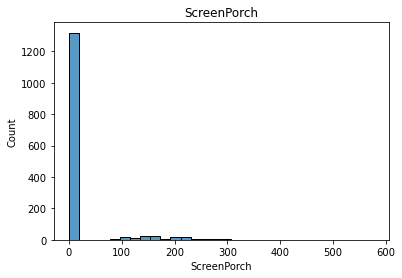

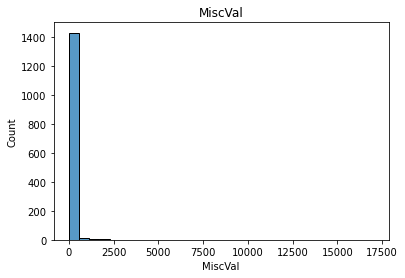

In [415]:
for column in continuos_numerical:
    sns.histplot(test[column], bins=30)
    plt.title(column)
    plt.show()

In [416]:
for column in continuos_numerical:
    if 0 not in test[column].unique():
        test[column] = np.log(test[column])

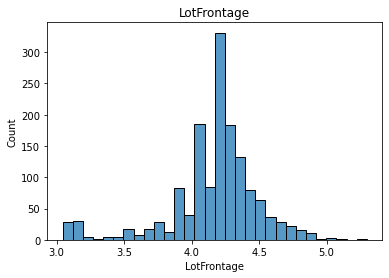

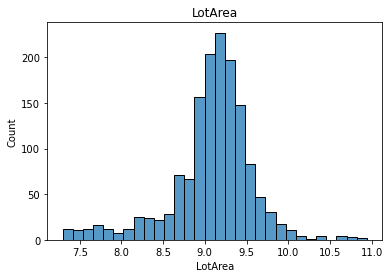

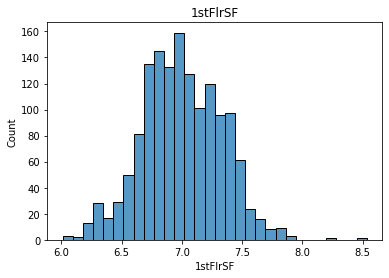

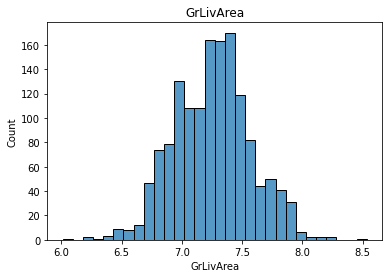

In [417]:
for column in continuos_numerical:
    if 0 not in test[column].unique():
        sns.histplot(test[column], bins=30)
        plt.title(column)
        plt.show()

## Rare Categories

In [418]:
# for feature in categorical_columns:
#     temp = test['MSZoning'].value_counts() / len(test)
#     temp_df = temp[temp < 0.01].index

#     test[feature] = np.where(test[feature].isin(temp_df), 'Rare_var', test[feature])

In [419]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
for column in categorical_columns:
    test[column] = encoder.fit_transform(test[column])

In [420]:
feature_scale = categorical_columns + numerical_columns 

data_test = pd.DataFrame(sc.transform(test[feature_scale]), columns=feature_scale)

In [421]:
y_test = model.predict(data_test)

In [422]:
original_dataset = pd.read_csv('test.csv')

In [423]:
sample_submission = pd.DataFrame({'Id': original_dataset['Id'], 'SalePrice': y_test})

In [424]:
sample_submission.to_csv('sample_submission.csv', index=False)